In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
movies=pd.read_csv("movies.csv")

In [7]:
movies=movies[movies.rating.isna()==False]
valid_ids=list(movies.id)

In [8]:
genres=pd.read_csv("genres.csv")
genres=genres[genres.id.isin(valid_ids)]

In [9]:
all_genres=list(set(list(genres.genre)))

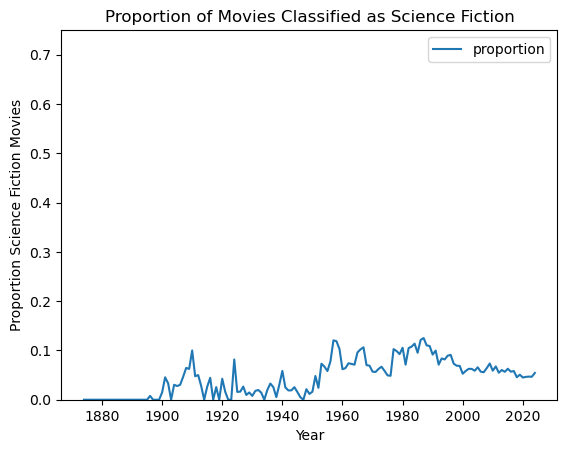

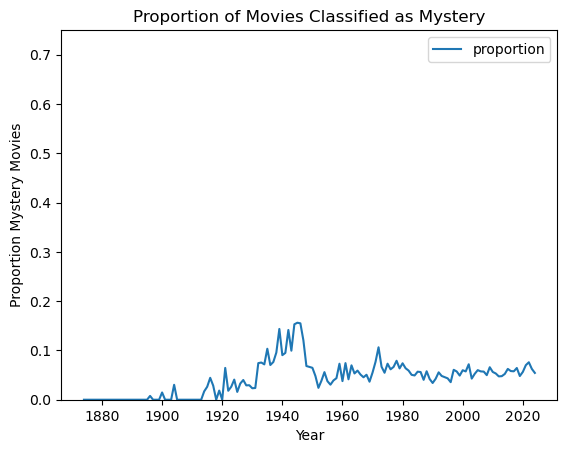

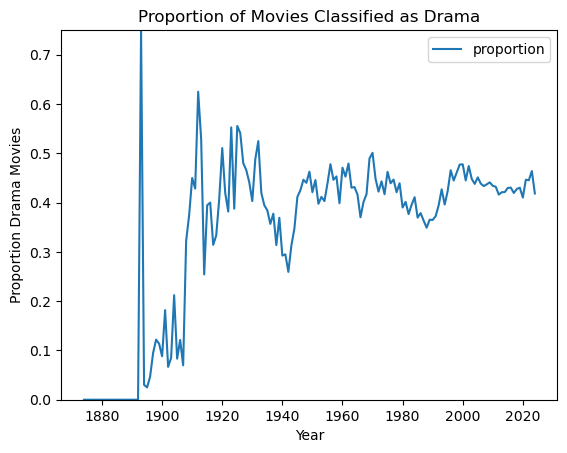

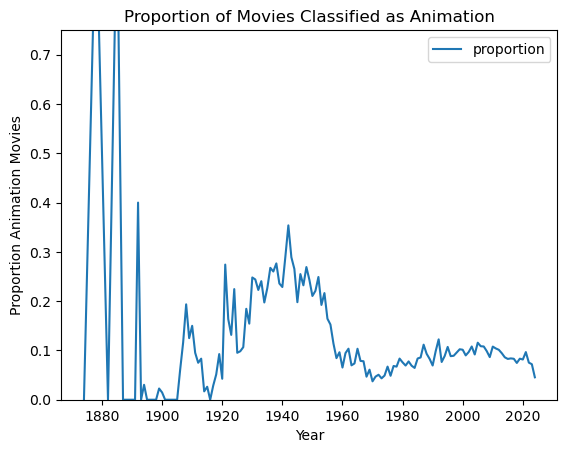

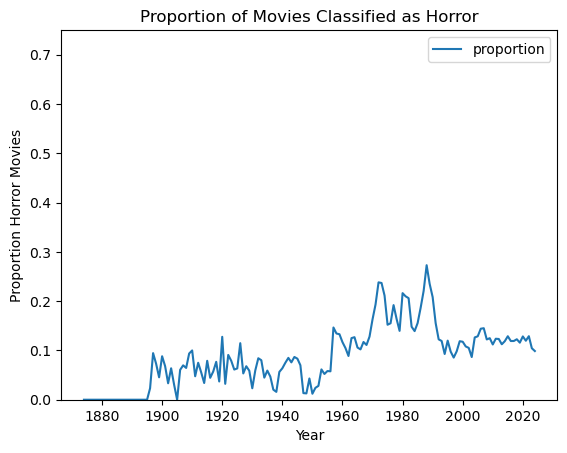

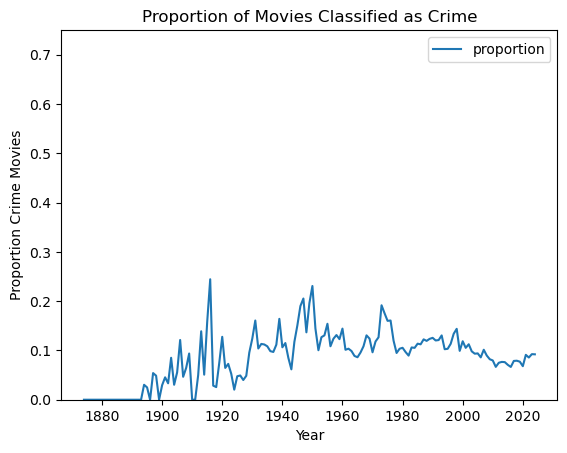

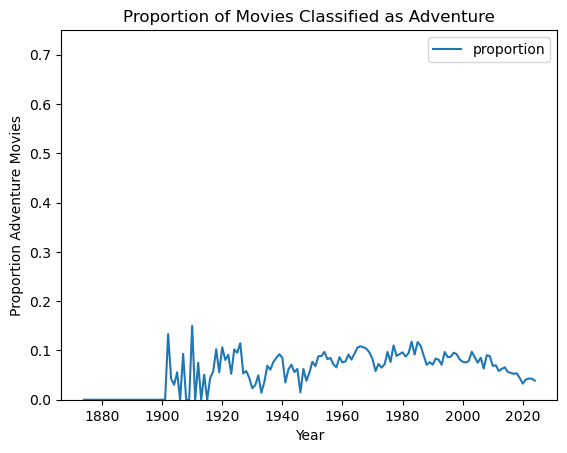

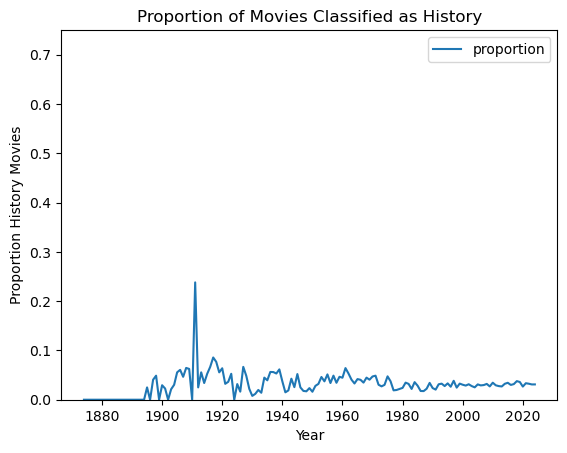

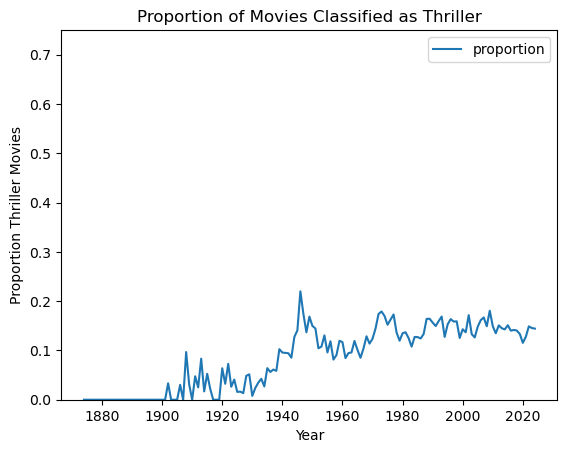

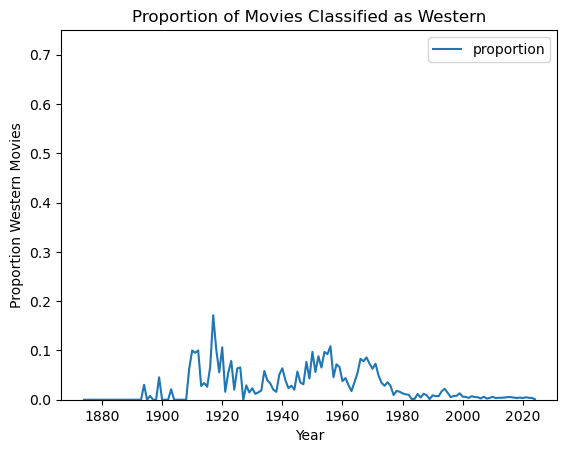

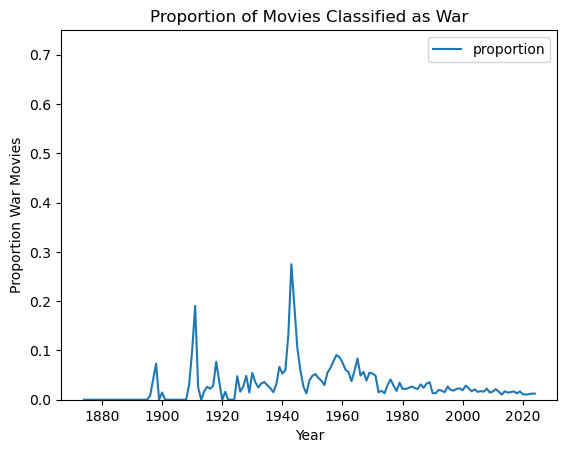

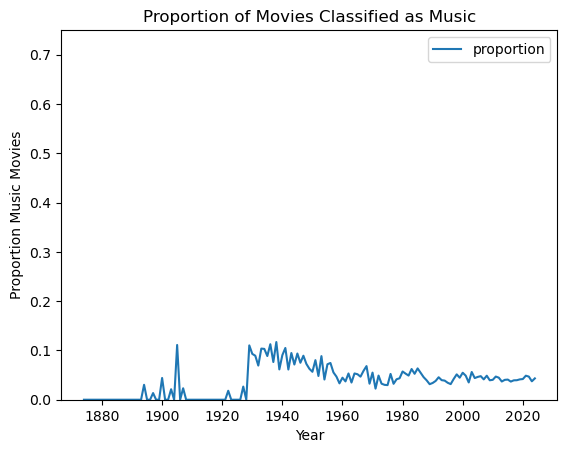

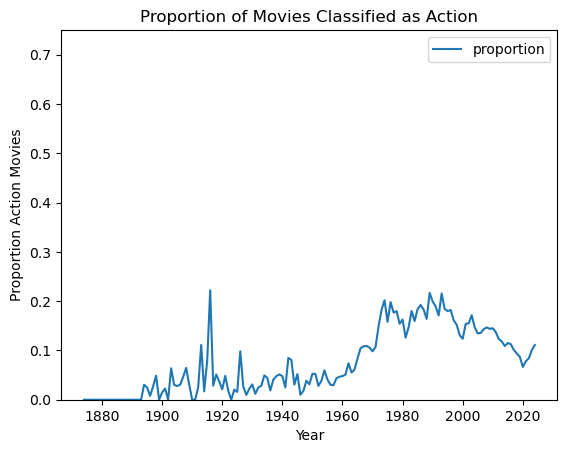

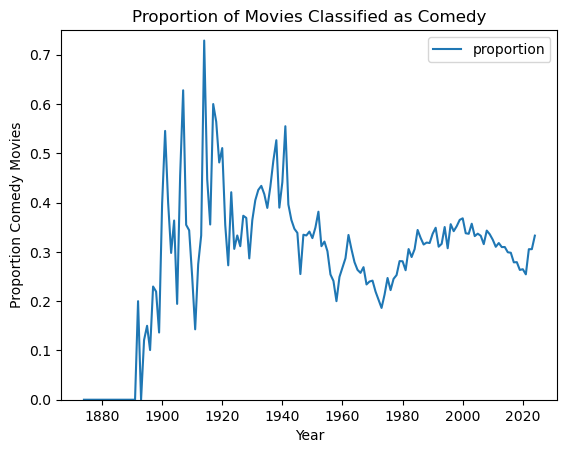

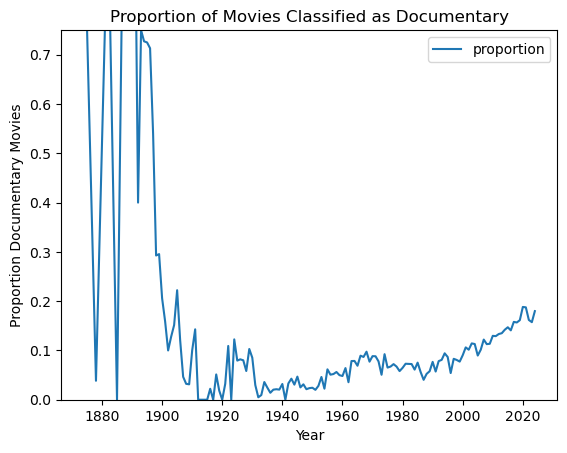

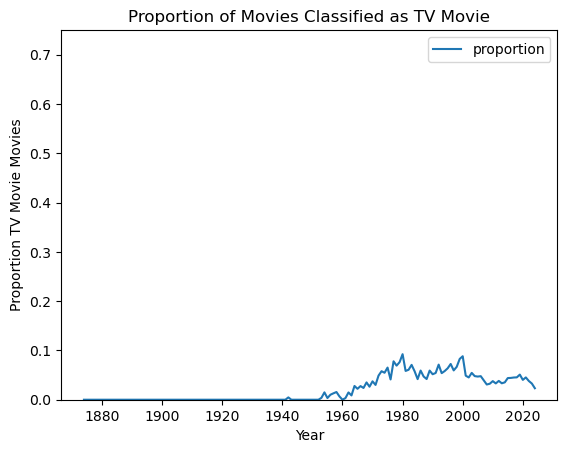

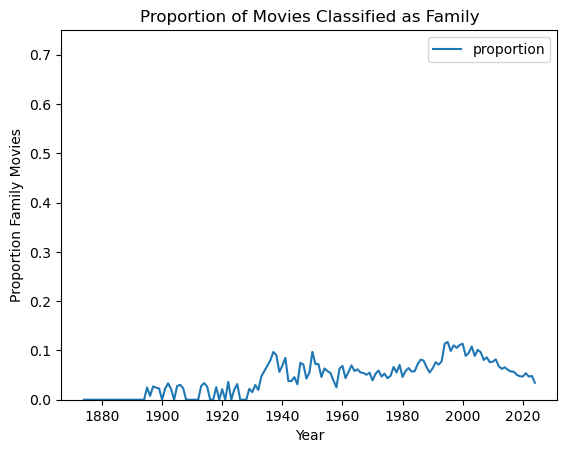

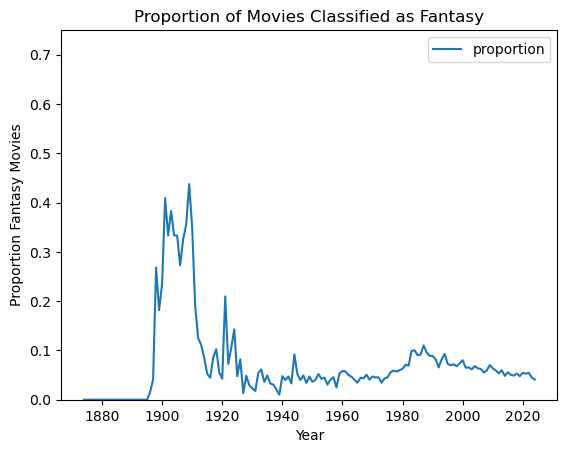

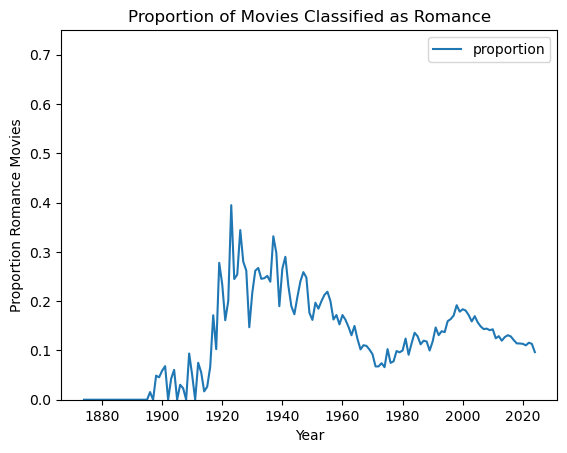

In [10]:
for kind in all_genres:
    props=[]
    yr=[]
    for year in range(int(min(movies.date)),2025):
        ids_year=movies.id[movies.date==year]
        if len(ids_year)==0:
            continue
        prop=sum(genres.genre[genres.id.isin(ids_year)]==kind)/len(ids_year)
        props.append(prop)
        yr.append(year)
    df=pd.DataFrame({"year":yr,"proportion":props})
    xlbl="Year"
    ylbl="Proportion "+kind+" Movies"
    main="Proportion of Movies Classified as "+kind
    df.plot(x='year',y='proportion')
    plt.title(main)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.ylim(0,.75)
    plt.savefig(kind+"plot.png")